In [2]:
import numpy as np
import pickle


f = open(f"/Users/akotamraju/Documents/dev/URAP/main-responseapprox/data/128-denoised/FlatContinuumIsotropic.inc970.id1.tra.gz.pkl", "rb");
    
vals = pickle.load(f)

y_arr = np.array(vals['y'])
print(y_arr.shape)

f.close()

(36, 196608)


In [3]:
arr = y_arr[10]

In [7]:
arr = arr.reshape(384, 512)

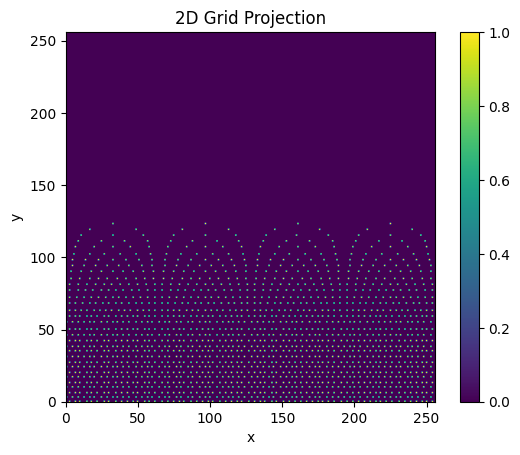

In [41]:
# First, make sure you have the required libraries installed
# You can install them using pip:
# pip install healpy matplotlib

# Python code
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

def healpix_to_spherical(healpix_array):
    nside = hp.get_nside(healpix_array)
    theta, phi = hp.pix2ang(nside, np.arange(len(healpix_array)))
    return theta, phi

def spherical_to_2d_grid(theta, phi, grid_size):
    # Convert spherical coordinates to 2D grid coordinates
    x = (phi / (2 * np.pi)) * grid_size
    y = ((np.pi / 2 - theta) / np.pi) * grid_size
    return x, y

def plot_2d_grid(x, y, grid_size):
    # Create a 2D grid
    grid = np.zeros((grid_size, grid_size))

    # Fill the grid with values from the spherical coordinates
    for i in range(len(x)):
        xi, yi = int(x[i]), int(y[i])
        if 0 <= xi < grid_size and 0 <= yi < grid_size:
            grid[yi, xi] = 1  # Set a value (e.g., 1) at the grid position

    # Display the 2D grid
    plt.imshow(grid, origin='lower', extent=[0, grid_size, 0, grid_size])
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('2D Grid Projection')
    plt.show()

# Example usage
# Replace 'healpix_array' with your actual HEALPix array
# Replace 'grid_size' with the desired size of the 2D grid (e.g., 256)
healpix_array = np.random.rand(hp.nside2npix(16))  # Example random HEALPix array
grid_size = 256

theta, phi = healpix_to_spherical(healpix_array)
x, y = spherical_to_2d_grid(theta, phi, grid_size)
plot_2d_grid(x, y, grid_size)


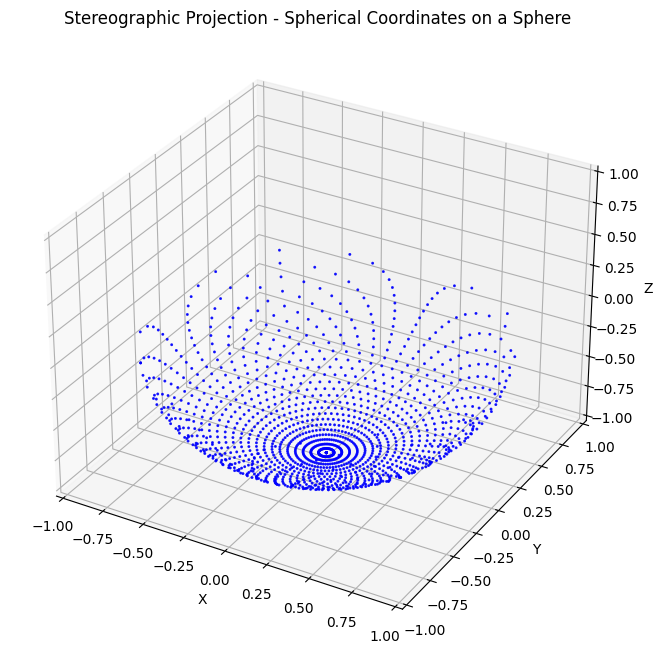

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def grid_to_spherical(x, y, grid_size):
    # Convert 2D grid coordinates to spherical coordinates
    phi = 2 * np.pi * (x / grid_size)
    theta = np.pi * (1 - y / grid_size)
    return theta, phi

def stereographic_projection(theta, phi):
    # Convert spherical coordinates to 3D Cartesian coordinates
    x = np.sin(theta) * np.cos(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(theta)
    return x, y, z

def plot_sphere(x, y, z):
    # Create a 3D plot for the sphere
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the sphere
    ax.scatter(x, y, z, s=1, c='b', alpha=0.6)

    # Set plot limits and labels
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Stereographic Projection - Spherical Coordinates on a Sphere')

    plt.show()

# Example usage
# Replace 'grid' with your 2D grid
# Replace 'grid_size' with the size of your 2D grid (same value as used before)
grid_size = 256
theta, phi = grid_to_spherical(x, y, grid_size)
x, y, z = stereographic_projection(theta, phi)
plot_sphere(x.flatten(), y.flatten(), z.flatten())
